In [1]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019_research_right.csv')
politics = pd.read_csv('9th_legislator_promise.csv')
fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [2]:
lin=fb[fb.page_name=="林淑芬"]
lin.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
20051,169014523134260_2030287527006941,169014523134260,林淑芬,政治人物,NaN,NaN,link,https://www.facebook.com/169014523134260/posts/2030287527006941/,2019-01-15T11:26:05+0000,2019-01-15T19:26:05,...,滕西華／缺乏受害救濟、回饋制度，再生醫療條例造福的是誰？ - 報導者 The Reporter,再生醫療將成台灣產業新亮點？醫藥技術可行，不代表著社會倫理同樣可行。這是目前對《再生醫療條例》草案最大的質疑。,139,0,0,0,0,0,5,1


In [3]:
lin['new_date'] = pd.to_datetime(lin['created_time_taipei']).dt.date
lin['month_year'] = pd.to_datetime(lin['new_date']).dt.to_period('M')
lin.head(1)

<ipython-input-3-720d83586c98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin['new_date'] = pd.to_datetime(lin['created_time_taipei']).dt.date
<ipython-input-3-720d83586c98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin['month_year'] = pd.to_datetime(lin['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
20051,169014523134260_2030287527006941,169014523134260,林淑芬,政治人物,NaN,NaN,link,https://www.facebook.com/169014523134260/posts/2030287527006941/,2019-01-15T11:26:05+0000,2019-01-15T19:26:05,...,139,0,0,0,0,0,5,1,2019-01-15,2019-01


In [4]:
# 依照按讚數 低到高排序
lin = lin.sort_values(by=['like_count'])
# 用新的排序當作順序
lin.reset_index(inplace=True)

In [5]:
doc_names = range(len(lin)) #有幾篇文章 : 444 篇文章
doc_names

range(0, 254)

In [6]:
lin = lin.replace(np.nan, '', regex=True) # 將nan取代成空白字串
text_list = list(lin['message']) # 把所有message轉成一個list 用for iterate

In [7]:
# 先看第一個
words = jieba.lcut(text_list[0], cut_all = False) # lcut return a "list"
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/bb/vrfcp_x10vb62mbgn3fyfn640000gp/T/jieba.cache
Loading model cost 0.605 seconds.
Prefix dict has been built succesfully.


['與淑芬', '①', '起', '勇敢', '堅持', ' ', '守護', '台灣', '！']


In [8]:
words = jieba.cut(text_list[0], cut_all = False) 
print(words)
#for word in words:
 #   print(word)

<generator object Tokenizer.cut at 0x7fd8b77fe660>


In [9]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")

punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
lin_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
lin_docs['jieba_results'] = lin_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    s = pd.Series({'jieba_results': text})
    lin_docs = lin_docs.append(s, ignore_index=True)
    #每次的斷詞結果都加回liu_docs

In [10]:
lin_docs

,jieba_results
0,與淑芬 ① 起 勇敢 堅持 守護 台灣 ！
1,📣 小小 公民 國會 體驗營 最後名 額釋 出 \r\r第二 屆 小小 公民 國會 體驗 營來 囉 \r\r立法院 在 哪裡 \r為 什麼 我們 需要 立法院 \r立法 委員 的 工作 內容 都 在 做 什麼 \r立法 委員 在 哪裡 開會 \r電視 新聞 常常 出現 立法 委員 和 行政部 門官員 的 質詢 和 備詢 又 是 怎麼 一 回事 呢 \r\r 年 我們 舉辦 第一 屆 小小 公民 認識 國會 \r讓 小小 公民 執行 立委 職權 質詢 環保署 署長 。 \r今年 我們 同樣 規劃 不同 的 部會 官員前 來備 詢報 告業務 \r小小 公民 練習 上台 質詢 你 準備 好 了 嗎 \r\r報名 日期 即日起 至 月 日 最 後 位名額 額滿 為止 \r報名 方式 網路 報名 / / . / 現場 報名 服務 處 新北市 蘆洲 區長 興路 號 \r活動 梯次 第一 梯 / 二 - \r活動 人數 每梯 最多 人 小孩 至多 位 額滿 為止 \r活動 對象 國小 四到 六年 級學生 最多 可 由 一家 長 陪同 參與 \r集合 地點 林淑芬 委員 蘆洲 服務 處 新北市 蘆洲 區長 興路 號 \r集合 時間 月 日 \r活動費用 元 保險 車資 餐盒 請 至 蘆洲 服務 處 繳費 繳費 完成 才 視同 完成 報名 程序 。 若 當天 缺席 恕 不 退費 。 \r主辦 單位 立委 林淑芬 辦 公室 \r\r名額 有限 以 蘆洲 五股 三重 地區 的 小小 公民 優先 錄取 哦 ～
2,
3,小小 公民 國會 體驗營 第二 梯次 徐國勇 部長 率隊 備詢 \r\r今天 國會 體驗營 模擬 委員 會會議 \r特別 感謝 內政部 徐國勇 部長 撥 冗 與 會 。 \r\r口才 流利 的 部長 阿伯 \r用 淺顯 易懂 的 方式 介紹 內政部 的 業務 \r而且 答詢 完全 比照 正式 委員 會 \r除了 說明 政策 立場 也 做 了 政策 裁示 。 \r\r小小 公民 把握 難得 機會 與 部長 討論 政策 \r活動 聚焦 在 社區 治安 災害 防救 與 國家 公園 保育 與 開發 \r但 小 立委 們 更 關切 警察 勤務 \r提問 範圍 包含 警察 配戴 的 警械 會 因為 職位 不同 嗎 \r警察 不 小心 射殺 到 路 人 怎麼 辦 \r歹徒 如果 是 警察 的 親友 他 不敢 開槍 怎麼 辦 等等 \r\r也 有 小 立委 以 自身 經驗 出發 \r關切 校園 霸凌 事件 警察 是否 能夠 介入 \r以及 騎樓 違停 佔 用 造成 上下 學 走路 經常 需繞 道 而行 \r期盼 政府 能協助 解決 。 \r\r兩天 的 體驗 營圓滿 落幕 \r如果 想 掌握 第一手 淑芬 的 活動 資訊 \r記得 要 密切 關注淑芬 的 訊息動態 喔 ～
4,
...,...
249,# 就 憑 這篇 胡說 八道 的 報導 指控 我們 \r / / . . . / / / / \r\r誰 加蔥 ? 誰 加料 ? \r哪裡 加蔥 ? 哪裡 加料 ? \r修法 過程 哪裡 不 理性 ? \r委員 會 實質 審查 過程 全程 參與 的 沒 幾個 \r不 知道 誰 不 理性 ? 哪裡 不 理性 了 ? \r沒共識 的 責任 在 我們 嘛 \r妳 最好 站 出來 辯論 一下 說 清楚 。 \r不用 老是 指著 人民 的 鼻子 教訓 人民 。
250,感謝 各位 好 朋友 的 支持 \r淑芬 確定 參與 年 立委 選舉 。 \r明年 大選 在 財團 當道 以及 中國 的 威脅 下 \r將是 一場 硬仗 \r淑 芬懇 請 大家 一起 團結 \r與淑芬 共同努力 \r我們 還要 打贏 選戰 。
251,不要 再以 無共識 之名 丟下 礦業法 \r\r從 年 月 礦業法 在 臨時會 開啟 首次 審查 後 \r到 年 月 日共 七次 委員 會 天審查 並審查 完竣 出 委員 會 \r到 年 月 日 歷經 四次 黨團 協商 \r已 由 原本 多達 個 版本 \r整理 到僅 剩 個 條文 保留 送交 院會 處理 \r大部分 為 內容置 於 何條 次之 爭議 。 \r\r此外 多數 條文 更 已達成 下列 共識 \r 採礦 需 合理 利用 並兼顧 經濟 環境 與 文化 永續 發展 第 條 \r 主管 機關 應針 對 礦種 每 五年 提出 整體 產業 政策 評估 報告 第 - 條 \r 原住民 基 於 傳統 文化 祭儀 非營利 而 採取 礦物 除罪 化 第 條 \r 除了 石油 礦及 天然 氣礦 之外 的 水平面 積 最 多 公頃 第 條 \r 特定 條件 情節 重大 違規者 不予 設定 礦權 第 條 \r 環境 敏感 區內 採礦 需該 管機關 同意 第 條 \r 霸王 條款 礦權 展限 不再 原則 許可 例外 否准 礦業 權者 拿 不到 礦權 政府 不用 再 賠天價 補償 金 第 條 \r 霸王 條款 礦業 權者 需先 取得 礦業 用地 該 土地 與 建物 所有 權人 同意 才 可 使用 土地 第 條 \r\r而 尚未 達 成共識 的 是 \r 礦區 周邊 居民 需 同意 條第 款 \r 礦權 展限 需經 土地 主管 機關 內政部 同意 條第 款 \r 礦業 權者 需 提出 關礦 計畫 條 \r\r關礦 計畫 中 \r在 我們 的 版本 中 關礦 計畫 要求 礦業 權者 \r除了 礦區 土地 復 育及 再 利用 規劃 等 環境 問題 \r更 要求 礦業 權者 需 提出 礦後社區 之 社會 經濟 發展 方案 \r礦場 作業 人員 安置 與 輔導 轉業 措施 。 \r礦場員工 的 工作 權 \r就是 大家 最 在乎 的 就業 保障 問題 。 \r\r原住民 的 諮 商 同意 權 部分 \r我們 認為 應 尊重 原住 民族 委員 意見 \r或 回歸 原基 法處理 。 \r\r至於 業者 與 行政部 門關心 的 環評 這條 條文 - 雖然 已 在 委員 會 通過 \r對 我們 而言 \r為 了 法案 通過 \r我們 認為 仍 有 協商 的 空間 。 \r\r礦是 國家 的 \r採礦 是 特 許權 \r為 了 修正 這嚴 重傾向 圖利 礦業 權者 的 礦業法 \r為 了 台灣 的 環境 永續 與 兼顧 產業 發展 我們 已 退 無 可退 。 \r\r加什麼 蔥 \r我們 一再 退 讓 已 經退 無 可退 \r 贏得 勝利 不要 丟下 礦業法
252,淑芬 將為 三重 蘆洲 五股 地區 鄉親 參選 區域 立委 到底 \r\r過去 一段 時間 \r忙 著 協助 余天 大哥 的 補選 \r很 開心 看到 余天 大哥 順利 當選 。 \r回想 過去 年 的 立委 選舉 \r在 民進黨 最 艱困 的 時候 \r淑芬 也 和 余天 大哥 一起 守住 了 從 彰化 以北 唯二 的 兩個 席次 。 \r\r現在 我 也 必須 為 自己 明年 的 區域 立委 選舉 更 努力 了 \r# 淑芬 要 慎重 地 跟 大家 宣 佈 \r# 淑芬 是 蘆洲 五股 三重 東區 里 的 區域 立委 \r未來 也 會 持續 以 # 區域 立委 的 身份 參選 。 \r近來 有人 故意 放話 造謠 說 \r我要 去 當不分區 立委 \r對方 還鼓勵 選民要 我 去 當不分區 。 \r# 故意 混淆 選民 的 認知 \r# 這 不是 事實 。 \r# 我絕 對 不會 去 當不分區 立委 \r\r區域 立委 的 重要性 \r就是 因為 是 由 人民 一人 一票 選出 來 的 \r具有 直接 民意 的 基礎 \r而 不是 像 不 分區 被 指派 的 \r\r因為 有 大家 一票 一票 選票 的 託 付 \r淑芬 才能 毫無畏 懼 的 敢 堅持 說 真話 。 \r\r希望 蘆洲 五股 三重 東區 的 好 朋友 \r支持 敢 堅持 說 真話 站 在 人民 這一邊 的 淑芬 繼續 參選 \r請 幫淑芬 宣傳 澄清 拉票 \r請成 為淑芬 堅強 溫暖 的 後 盾 ！


In [11]:
lin['jieba_results'] = lin_docs
lin_post = lin[['new_date','message','jieba_results','like_count']]
lin_post

,new_date,message,jieba_results,like_count
0,2019-12-18,與淑芬①起勇敢堅持 守護台灣！,與淑芬 ① 起 勇敢 堅持 守護 台灣 ！,81
1,2019-01-11,【📣小小公民國會體驗營，最後名額釋出！】\r\n\r\n第二屆小小公民國會體驗營來囉！\r\n\r\n立法院在哪裡？\r\n為什麼我們需要立法院？\r\n立法委員的工作內容都在做什麼？\r\n立法委員在哪裡開會？\r\n電視新聞常常出現立法委員和行政部門官員的質詢和備詢，又是怎麼一回事呢？\r\n\r\n2017年我們舉辦第一屆小小公民認識國會，\r\n讓小小公民執行立委職權質詢環保署署長。\r\n今年，我們同樣規劃不同的部會官員前來備詢報告業務，\r\n小小公民練習上台質詢，你準備好了嗎？\r\n\r\n報名日期：即日起至1月15日（＃最後10位名額，額滿為止）\r\n報名方式：網路報名（https://goo.gl/3aJ6xR）、現場報名（服務處：新北市蘆洲區長興路25號）\r\n活動梯次：第一梯：1/22(二)9:30-12:00\r\n活動人數：每梯最多42人（小孩至多30位），額滿為止\r\n活動對象：國小四到六年級學生（最多可由一家長陪同參與）\r\n集合地點：林淑芬委員蘆洲服務處（新北市蘆洲區長興路25號）\r\n集合時間：1月22日9:15\r\n活動費用：150元（保險、車資、餐盒）【請至蘆洲服務處繳費，繳費完成才視同完成報名程序。若當天缺席恕不退費。】\r\n主辦單位：立委林淑芬辦公室\r\n\r\n＃名額有限，以蘆洲、五股、三重地區的小小公民優先錄取哦～,📣 小小 公民 國會 體驗營 最後名 額釋 出 \r\r第二 屆 小小 公民 國會 體驗 營來 囉 \r\r立法院 在 哪裡 \r為 什麼 我們 需要 立法院 \r立法 委員 的 工作 內容 都 在 做 什麼 \r立法 委員 在 哪裡 開會 \r電視 新聞 常常 出現 立法 委員 和 行政部 門官員 的 質詢 和 備詢 又 是 怎麼 一 回事 呢 \r\r 年 我們 舉辦 第一 屆 小小 公民 認識 國會 \r讓 小小 公民 執行 立委 職權 質詢 環保署 署長 。 \r今年 我們 同樣 規劃 不同 的 部會 官員前 來備 詢報 告業務 \r小小 公民 練習 上台 質詢 你 準備 好 了 嗎 \r\r報名 日期 即日起 至 月 日 最 後 位名額 額滿 為止 \r報名 方式 網路 報名 / / . / 現場 報名 服務 處 新北市 蘆洲 區長 興路 號 \r活動 梯次 第一 梯 / 二 - \r活動 人數 每梯 最多 人 小孩 至多 位 額滿 為止 \r活動 對象 國小 四到 六年 級學生 最多 可 由 一家 長 陪同 參與 \r集合 地點 林淑芬 委員 蘆洲 服務 處 新北市 蘆洲 區長 興路 號 \r集合 時間 月 日 \r活動費用 元 保險 車資 餐盒 請 至 蘆洲 服務 處 繳費 繳費 完成 才 視同 完成 報名 程序 。 若 當天 缺席 恕 不 退費 。 \r主辦 單位 立委 林淑芬 辦 公室 \r\r名額 有限 以 蘆洲 五股 三重 地區 的 小小 公民 優先 錄取 哦 ～,134
2,2019-01-15,,,139
3,2019-01-23,【小小公民國會體驗營第二梯次，徐國勇部長率隊備詢！】\r\n\r\n今天國會體驗營模擬委員會會議，\r\n特別感謝內政部徐國勇部長撥冗與會。\r\n\r\n口才流利的「部長阿伯」，\r\n用淺顯易懂的方式介紹內政部的業務，\r\n而且答詢完全比照正式委員會，\r\n除了說明政策立場，也做了政策裁示。\r\n\r\n小小公民把握難得機會，與部長討論政策，\r\n活動聚焦在社區治安、災害防救與國家公園保育與開發，\r\n但小立委們更關切警察勤務，\r\n提問範圍包含「警察配戴的警械會因為職位不同嗎？」\r\n「警察不小心射殺到路人怎麼辦？」、\r\n「歹徒如果是警察的親友，他不敢開槍怎麼辦？」等等，\r\n\r\n也有小立委以自身經驗出發，\r\n關切「校園霸凌事件，警察是否能夠介入？」\r\n以及騎樓違停佔用，造成上下學走路經常需繞道而行，\r\n期盼政府能協助解決。\r\n\r\n兩天的體驗營圓滿落幕，\r\n如果想掌握第一手淑芬的活動資訊，\r\n記得要密切關注淑芬Line的訊息動態喔～,小小 公民 國會 體驗營 第二 梯次 徐國勇 部長 率隊 備詢 \r\r今天 國會 體驗營 模擬 委員 會會議 \r特別 感謝 內政部 徐國勇 部長 撥 冗 與 會 。 \r\r口才 流利 的 部長 阿伯 \r用 淺顯 易懂 的 方式 介紹 內政部 的 業務 \r而且 答詢 完全 比照 正式 委員 會 \r除了 說明 政策 立場 也 做 了 政策 裁示 。 \r\r小小 公民 把握 難得 機會 與 部長 討論 政策 \r活動 聚焦 在 社區 治安 災害 防救 與 國家 公園 保育 與 開發 \r但 小 立委 們 更 關切 警察 勤務 \r提問 範圍 包含 警察 配戴 的 警械 會 因為 職位 不同 嗎 \r警察 不 小心 射殺 到 路 人 怎麼 辦 \r歹徒 如果 是 警察 的 親友 他 不敢 開槍 怎麼 辦 等等 \r\r也 有 小 立委 以 自身 經驗 出發 \r關切 校園 霸凌 事件 警察 是否 能夠 介入 \r以及 騎樓 違停 佔 用 造成 上下 學 走路 經常 需繞 道 而行 \r期盼 政府 能協助 解決 。 \r\r兩天 的 體驗 營圓滿 落幕 \r如果 想 掌握 第一手 淑芬 的 活動 資訊 \r記得 要 密切 關注淑芬 的 訊息動態 喔 ～,154
4,2019-10-24,,,155
...,...,...,...,...
249,2019-11-17,#就憑這篇胡說八道的報導指控我們\r\nhttps://news.ltn.com.tw/news/politics/breakingnews/2442645\r\n\r\n誰加蔥?誰加料?\r\n哪裡加蔥?哪裡加料?\r\n修法過程哪裡不理性?\r\n委員會實質審查過程，全程參與的沒幾個，\r\n不知道誰不理性?哪裡不理性了?\r\n沒共識的責任在我們嘛？\r\n妳最好站出來辯論一下 說清楚。\r\n不用老是指著人民的鼻子教訓人民。,# 就 憑 這篇 胡說 八道 的 報導 指控 我們 \r / / . . . / / / / \r\r誰 加蔥 ? 誰 加料 ? \r哪裡 加蔥 ? 哪裡 加料 ? \r修法 過程 哪裡 不 理性 ? \r委員 會 實質 審查 過程 全程 參與 的 沒 幾個 \r不 知道 誰 不 理性 ? 哪裡 不 理性 了 ? \r沒共識 的 責任 在 我們 嘛 \r妳 最好 站 出來 辯論 一下 說 清楚 。 \r不用 老是 指著 人民 的 鼻子 教訓 人民 。,6568
250,2019-04-23,感謝各位好朋友的支持，\r\n淑芬確定參與2020年立委選舉。\r\n明年大選在財團當道，以及中國的威脅下，\r\n將是一場硬仗，\r\n淑芬懇請大家一起團結，\r\n與淑芬共同努力，\r\n我們還要打贏2020選戰。,感謝 各位 好 朋友 的 支持 \r淑芬 確定 參與 年 立委 選舉 。 \r明年 大選 在 財團 當道 以及 中國 的 威脅 下 \r將是 一場 硬仗 \r淑 芬懇 請 大家 一起 團結 \r與淑芬 共同努力 \r我們 還要 打贏 選戰 。,7109
251,2019-11-18,【不要再以無共識之名，丟下礦業法！】\r\n\r\n從2017年7月礦業法在臨時會開啟首次審查後，\r\n到2018年5月30日共七次委員會11天審查並審查完竣出委員會，\r\n到2019年5月29日歷經四次黨團協商，\r\n已由原本多達13個版本，\r\n整理到僅剩26個條文保留送交院會處理，\r\n大部分為內容置於何條次之爭議。\r\n\r\n此外，＃多數條文更已達成下列共識：\r\n1、採礦需合理利用，並兼顧經濟、環境與文化永續發展！（第1條）\r\n2、主管機關應針對礦種每五年提出整體產業政策評估報告（第5-1條）\r\n3、原住民基於傳統文化、祭儀、非營利而採取礦物除罪化（第7條）\r\n4、除了石油礦及天然氣礦之外的水平面積最多300公頃（第8條）\r\n5、特定條件情節重大違規者不予設定礦權（第19條）\r\n6、環境敏感區內採礦需該管機關同意（第29條）\r\n7、霸王條款：礦權展限不再「原則許可，例外否准」，礦業權者拿不到礦權，政府不用再賠天價補償金！（第33條）\r\n8、霸王條款：礦業權者需先取得礦業用地該土地與建物所有權人同意才可使用土地！（第47條）\r\n\r\n而 ＃尚未達成共識的是：\r\n1、礦區周邊居民需同意（29條第4款）\r\n2、礦權展限需經土地主管機關內政部同意（33條第7款）\r\n3、礦業權者需提出關礦計畫（45條）\r\n\r\n關礦計畫中，\r\n在我們的版本中，關礦計畫要求礦業權者，\r\n除了礦區土地復育及再利用規劃等環境問題，\r\n更要求礦業權者需提出礦後社區之社會經濟發展方案、\r\n礦場作業人員安置與輔導轉業措施。\r\n＃礦場員工的工作權，\r\n＃就是大家最在乎的就業保障問題。\r\n\r\n原住民的諮商同意權部分，\r\n我們認為應尊重原住民族委員意見，\r\n或回歸原基法處理。\r\n\r\n至於業者與行政部門關心的環評這條條文（58-1）雖然已在委員會通過，\r\n對我

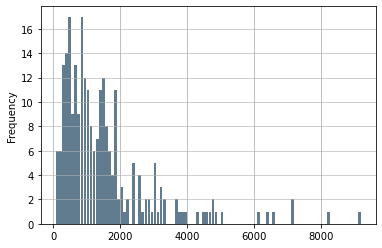

In [12]:
# 看讚數的分佈 y 軸是該讚數的貼文數 來看我們要怎麼取哪個讚數區間資料
commutes = lin_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [13]:
temp = lin_post[(lin_post['like_count'] <= 500) & (lin_post['like_count'] > 100)] #讚數大於500 小於1000才取 : 201  篇文章
temp

,new_date,message,jieba_results,like_count
1,2019-01-11,【📣小小公民國會體驗營，最後名額釋出！】\r\n\r\n第二屆小小公民國會體驗營來囉！\r\n\r\n立法院在哪裡？\r\n為什麼我們需要立法院？\r\n立法委員的工作內容都在做什麼？\r\n立法委員在哪裡開會？\r\n電視新聞常常出現立法委員和行政部門官員的質詢和備詢，又是怎麼一回事呢？\r\n\r\n2017年我們舉辦第一屆小小公民認識國會，\r\n讓小小公民執行立委職權質詢環保署署長。\r\n今年，我們同樣規劃不同的部會官員前來備詢報告業務，\r\n小小公民練習上台質詢，你準備好了嗎？\r\n\r\n報名日期：即日起至1月15日（＃最後10位名額，額滿為止）\r\n報名方式：網路報名（https://goo.gl/3aJ6xR）、現場報名（服務處：新北市蘆洲區長興路25號）\r\n活動梯次：第一梯：1/22(二)9:30-12:00\r\n活動人數：每梯最多42人（小孩至多30位），額滿為止\r\n活動對象：國小四到六年級學生（最多可由一家長陪同參與）\r\n集合地點：林淑芬委員蘆洲服務處（新北市蘆洲區長興路25號）\r\n集合時間：1月22日9:15\r\n活動費用：150元（保險、車資、餐盒）【請至蘆洲服務處繳費，繳費完成才視同完成報名程序。若當天缺席恕不退費。】\r\n主辦單位：立委林淑芬辦公室\r\n\r\n＃名額有限，以蘆洲、五股、三重地區的小小公民優先錄取哦～,📣 小小 公民 國會 體驗營 最後名 額釋 出 \r\r第二 屆 小小 公民 國會 體驗 營來 囉 \r\r立法院 在 哪裡 \r為 什麼 我們 需要 立法院 \r立法 委員 的 工作 內容 都 在 做 什麼 \r立法 委員 在 哪裡 開會 \r電視 新聞 常常 出現 立法 委員 和 行政部 門官員 的 質詢 和 備詢 又 是 怎麼 一 回事 呢 \r\r 年 我們 舉辦 第一 屆 小小 公民 認識 國會 \r讓 小小 公民 執行 立委 職權 質詢 環保署 署長 。 \r今年 我們 同樣 規劃 不同 的 部會 官員前 來備 詢報 告業務 \r小小 公民 練習 上台 質詢 你 準備 好 了 嗎 \r\r報名 日期 即日起 至 月 日 最 後 位名額 額滿 為止 \r報名 方式 網路 報名 / / . / 現場 報名 服務 處 新北市 蘆洲 區長 興路 號 \r活動 梯次 第一 梯 / 二 - \r活動 人數 每梯 最多 人 小孩 至多 位 額滿 為止 \r活動 對象 國小 四到 六年 級學生 最多 可 由 一家 長 陪同 參與 \r集合 地點 林淑芬 委員 蘆洲 服務 處 新北市 蘆洲 區長 興路 號 \r集合 時間 月 日 \r活動費用 元 保險 車資 餐盒 請 至 蘆洲 服務 處 繳費 繳費 完成 才 視同 完成 報名 程序 。 若 當天 缺席 恕 不 退費 。 \r主辦 單位 立委 林淑芬 辦 公室 \r\r名額 有限 以 蘆洲 五股 三重 地區 的 小小 公民 優先 錄取 哦 ～,134
2,2019-01-15,,,139
3,2019-01-23,【小小公民國會體驗營第二梯次，徐國勇部長率隊備詢！】\r\n\r\n今天國會體驗營模擬委員會會議，\r\n特別感謝內政部徐國勇部長撥冗與會。\r\n\r\n口才流利的「部長阿伯」，\r\n用淺顯易懂的方式介紹內政部的業務，\r\n而且答詢完全比照正式委員會，\r\n除了說明政策立場，也做了政策裁示。\r\n\r\n小小公民把握難得機會，與部長討論政策，\r\n活動聚焦在社區治安、災害防救與國家公園保育與開發，\r\n但小立委們更關切警察勤務，\r\n提問範圍包含「警察配戴的警械會因為職位不同嗎？」\r\n「警察不小心射殺到路人怎麼辦？」、\r\n「歹徒如果是警察的親友，他不敢開槍怎麼辦？」等等，\r\n\r\n也有小立委以自身經驗出發，\r\n關切「校園霸凌事件，警察是否能夠介入？」\r\n以及騎樓違停佔用，造成上下學走路經常需繞道而行，\r\n期盼政府能協助解決。\r\n\r\n兩天的體驗營圓滿落幕，\r\n如果想掌握第一手淑芬的活動資訊，\r\n記得要密切關注淑芬Line的訊息動態喔～,小小 公民 國會 體驗營 第二 梯次 徐國勇 部長 率隊 備詢 \r\r今天 國會 體驗營 模擬 委員 會會議 \r特別 感謝 內政部 徐國勇 部長 撥 冗 與 會 。 \r\r口才 流利 的 部長 阿伯 \r用 淺顯 易懂 的 方式 介紹 內政部 的 業務 \r而且 答詢 完全 比照 正式 委員 會 \r除了 說明 政策 立場 也 做 了 政策 裁示 。 \r\r小小 公民 把握 難得 機會 與 部長 討論 政策 \r活動 聚焦 在 社區 治安 災害 防救 與 國家 公園 保育 與 開發 \r但 小 立委 們 更 關切 警察 勤務 \r提問 範圍 包含 警察 配戴 的 警械 會 因為 職位 不同 嗎 \r警察 不 小心 射殺 到 路 人 怎麼 辦 \r歹徒 如果 是 警察 的 親友 他 不敢 開槍 怎麼 辦 等等 \r\r也 有 小 立委 以 自身 經驗 出發 \r關切 校園 霸凌 事件 警察 是否 能夠 介入 \r以及 騎樓 違停 佔 用 造成 上下 學 走路 經常 需繞 道 而行 \r期盼 政府 能協助 解決 。 \r\r兩天 的 體驗 營圓滿 落幕 \r如果 想 掌握 第一手 淑芬 的 活動 資訊 \r記得 要 密切 關注淑芬 的 訊息動態 喔 ～,154
4,2019-10-24,,,155
5,2019-09-20,【108課綱座談會：蘆洲、三重、五股場來了！】\r\n\r\n108課綱怎麼教？如何學？考試怎麼考?\r\n\r\n淑芬將舉辦三場座談會，\r\n邀請教育部金牌講師團親自來解析，\r\n#也開放一個小時讓家長提問喔\r\n\r\n★蘆洲★\r\n時間：9月21日（六）14：30\r\n地點：仁愛活動中心\r\n\r\n★三重★\r\n時間：9月21日（六）10：00 \r\n地點：碧華國小禮堂\r\n\r\n★五股★\r\n時間：9月22日（日）10：00\r\n地點：五股國小多功能會議室,課綱座 談會 蘆洲 三重 五股 場來 了 \r\r 課綱 怎麼 教 如何 學 考試 怎麼 考 ? \r\r淑芬 將舉 辦三場 座 談會 \r邀請 教育部 金牌 講師 團親 自來 解析 \r# 也 開放 一個 小時 讓 家長 提問 喔 \r\r★ 蘆洲 ★ \r時間 月 日 六 \r地點 仁愛活動 中心 \r\r★ 三重 ★ \r時間 月 日 六 \r地點 碧華 國小 禮堂 \r\r★ 五股 ★ \r時間 月 日 日 \r地點 五股 國小 多功能 會議室,168
6,2019-03-11,壯大基層醫療院所 衛福部還有更多努力空間\r\n\r\n政府推動分級醫療，\r\n希望民眾能找好厝邊的固定基層醫師把關健康，\r\n甚至喊出要壯大基層醫療，\r\n依據學者分析2013年的健保資料，\r\n五項（流感疫苗、成人健檢、微量白蛋白尿、空腹血脂、醣化血色素）全部都有提供的比例只占全部診所的8.25%、提供四項的也只有11.39%，\r\n總共有四項以上的只有19.64%；\r\n而甚至有47.61%、將近一半的診所，連一項都沒有提供。\r\n\r\n健保署從106年度增加預算至基層醫療，\r\n從原先每年編列11.8憶到目前是28.8億，\r\n但是我們的基層真的壯大了嗎？\r\n還是民眾必須到地區醫院、區域醫院甚至醫學中心才能完成這些檢查？！\r\n這又如何讓民眾對基層醫療有信心？\r\n衛福部說基層診所開轉診單到檢驗所檢驗，\r\n但卻又拿不出具體的數據，連最基本的掌握都沒有。\r\n\r\n健保署不該只追求加入家醫群的診所數量，以及病患加入會員的數量，\r\n如果基層醫療的品質沒有獲得民眾信賴，\r\n民眾又怎能對基層家庭醫師有信任。,壯大 基層 醫療 院所 衛福部 還有 更 多 努力 空間 \r\r政府 推動 分級 醫療 \r希望 民眾 能 找 好厝邊 的 固定 基層 醫師 把關 健康 \r甚至 喊 出要 壯大 基層 醫療 \r依據 學者 分析 年 的 健保資料 \r五項 流感疫苗 成人 健檢 微量 白 蛋白尿 空腹 血脂 醣化 血色素 全部 都 有 提供 的 比例 只 占 全部 診所 的 .% 提供 四項 的 也 只有 .% \r總 共有 四項 以上 的 只有 .% \r而 甚至 有 .% 將 近一半 的 診所 連一項 都 沒 有 提供 。 \r\r健保署 從 年度 增加 預算 至 基層 醫療 \r從 原先 每年 編列 . 憶到 目前 是 . 億 \r但是 我們 的 基層 真的 壯大 了 嗎 \r還是 民眾 必須 到 地區 醫院 區域 醫院 甚至 醫學 中心 才能 完成 這些 檢查 \r這又 如何 讓民眾 對 基層 醫療 有 信心 \r衛福部 說 基層 診所開 轉診 單到 檢驗 所 檢驗 \r但 卻 又 拿 不 出具 體的 數據 連最 基本 的 掌握 都 沒 有 。 \r\r健保署 不該 只 追求 加入 家醫群 的 診所 數量 以及 病患 加入 會員 的 數量 \r如果 基層 醫療 的 品質 沒有 獲得民眾 信賴 \r民眾 又 怎能 對 基層 家庭 醫師 有 信任 。,183
7,2019-09-17,【108課綱座談會：蘆洲、三重、五股場來了！】\r\n\r\n108課綱怎麼教？如何學？會考怎麼考？\r\n立委

In [14]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [31]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [32]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一些,一人,一份,一位,一個,一再,一天,一定,一家,一層,...,體驗,體驗營,高血壓,高風險,鳥會,黏貼,黑心,點調,鼎元光,鼓勵
0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063578,0.00000,...,0.057408,0.057408,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.071327,0.142654,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.00000,0.000000,0.000000,0.110477,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,0.00000,0.00000,0.000000,0.000000,0.061915,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.084004
7,0.11268,0.00000,0.101744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.11268,0.000000,0.000000,0.000000,0.000000
8,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [33]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['美食', '山林', '警察', '立委', '台灣', '淑芬', '大家', '蘆洲', '工程', '我們']
TOP 10 WORDS PER TOPIC #1
['災害', '地質', '要求', '安全', '職災', '植入物', '斷層', '重大', '乳房', '公開']
TOP 10 WORDS PER TOPIC #2
['民眾', '校園', '空中', '甚至', '開放', '以及', '社區', '提供', '醫療', '基層']
TOP 10 WORDS PER TOPIC #3
['疑慮', '藥廠', '立即', '致癌', '無法', '原料', '查驗', '食藥署', '藥品', '問題']
TOP 10 WORDS PER TOPIC #4
['小獅王', '動物', '委員', '活動', '報名', '蘆洲', '五股', '森林', '小小', '公民']
TOP 10 WORDS PER TOPIC #5
['三重', '如何', '課綱', '怎麼', '政府', '查核', '建材', '五股', '地點', '時間']
TOP 10 WORDS PER TOPIC #6
['常用', '預防', '勞工', '氫氟酸', '統計', '勞動部', '我們', '大家', '傷病', '職業']
TOP 10 WORDS PER TOPIC #7
['承攬', '衛福部', '自然人', '要求', '連線', '政府', '問題', '空氣', '管理', '監測']


In [34]:
LDA.fit(X)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['民眾', '具體', '校園', '以及', '甚至', '開放', '社區', '提供', '醫療', '基層']
TOP 10 WORDS PER TOPIC #1
['有害物', '常用', '預防', '勞工', '警察', '統計', '氫氟酸', '勞動部', '傷病', '職業']
TOP 10 WORDS PER TOPIC #2
['小小', '食藥署', '立委', '公民', '我們', '藥品', '政府', '淑芬', '蘆洲', '問題']
TOP 10 WORDS PER TOPIC #3
['可能', '進行', '健康', '衛福部', '台灣', '使用', '要求', '女性', '植入物', '乳房']
TOP 10 WORDS PER TOPIC #4
['電塔下', '即將', '淑芬', '蘆洲', '地下', '機頭', '進度', '預計', '拆除', '工程']
TOP 10 WORDS PER TOPIC #5
['監督', '地質', '管理', '安全', '空氣', '職災', '監測', '斷層', '重大', '公開']
TOP 10 WORDS PER TOPIC #6
['是否', '所有', '把關', '疑慮', '可以', '台灣', '中資', '春聯', '大家', '幫忙']
TOP 10 WORDS PER TOPIC #7
['課綱', '山林', '森林', '大家', '怎麼', '一起', '時間', '地點', '五股', '我們']


In [29]:
#政見
promise=politics[politics.姓名 == "林 淑 芬"].政見.to_string()
re.split('。 |：', promise) 

['10    在雞蛋與高牆之間，林淑芬選擇跟雞蛋同一邊',
 '站在人民這一邊的立委林淑芬',
 ' (1)為人民捍衛食品安全',
 ' 不畏財團壓力，勇敢揭發「頂新」黑心油弊案、日本輻射汙染管制區食品安 全的管制漏洞，以及政府放水藥廠，製作偽劣藥等。未來持續推動各種食品 安全管理制度的改革',
 '(2)為人民守護國土，山河海沒辦法投票，但這些事比選舉更重要',
 ' 淑芬要推國土三法的立法，已經完成「濕地法」及「海岸法」，未來將繼續 推動「國土計畫法」及「國土復育條例」立法，以守護台灣永續環境',
 '(3)為人民守住環境正義，不讓台灣成為「毒物島」',
 ' 淑芬完成修正「土污法」、「水污法」、「毒性化學物質管理法」，未來推 動「空污法」、「廢棄物減量及循環利用法」的改革，將乾淨的土地、水和 空氣還給人民',
 '(4)守護勞工、弱勢，責無旁貸',
 ' 因窮而被剝削的建教生，淑芬完成建教生權益保障法立法；米糠油事件受害 者暗夜的哭泣，淑芬完成「油症受害者救濟法」，讓政府盡到補償責任。23 年沒修的職災預防法「職業安全衛生管理法」，淑芬完成修法，讓勞工安全 有保障。關廠歇業工人失去的棺材本，淑芬努力完成「勞基法第28條」的修 正。淑芬將推動「職災保護法」與「職災保險法」，讓勞工的勞動身軀有國 家的保護',
 '(5)守護有尊嚴、可負擔、多元的在地老化權益',
 ' 淑芬完成推動「長照服務法」立法，未來監督政府提供可負擔、多元的居家 服務與日間照顧的長照制度，公部門需提供長照服務涵蓋率達6成，再推「長 照保險法」，以建構尊嚴老化的台灣。']

In [37]:
#政見做斷詞

politics_lin = politics[politics.姓名 == "林 淑 芬"].政見.to_string()
politics_lin = re.sub(re_punctuation, "", politics_lin)
politics_lin = re.sub(r'[0-9]','',politics_lin)
politics_lin = re.sub(r'[a-zA-Z]','',politics_lin)
politics_lin = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',politics_lin)  # 注意裡面不能有空白！
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_lin, cut_all = False)
print(words)

[' ', ' ', ' ', ' ', '在', '雞', '蛋', '與', '高牆', '之間', '，', '林淑芬', '選擇', '跟', '雞', '蛋', '同一', '邊', ' ', '站', '在', '人民', '這一邊', '的', '立委', '林淑芬', '(', ')', '為', '人民', '捍衛', '食品安全', '不畏', '財團', '壓力', '，', '勇敢', '揭發', '「', '頂', '新', '」', '黑心', '油', '弊案', '、', '日本', '輻射', '汙染', '管制', '區', '食品', '安', ' ', '全', '的', '管制', '漏洞', '，', '以及', '政府', '放水', '藥廠', '，', '製', '作', '偽', '劣', '藥', '等', '未', '來', '持續', '推動', '各種', '食品', ' ', '安全', '管理制度', '的', '改革', ' ', '(', ')', '為', '人民', '守護國土', '，', '山河', '海沒', '辦法', '投票', '，', '但', '這些', '事', '比', '選舉', '更', '重要', '淑芬', '要', '推國', '土三法', '的', '立法', '，', '已經', '完成', '「', '濕地法', '」', '及', '「', '海岸', '法', '」', '，', '未來將', '繼續', ' ', '推動', '「', '國土計', '畫法', '」', '及', '「', '國土', '復', '育', '條例', '」', '立法', '，', '以守護', '台灣', '永續', '環境', ' ', '(', ')', '為', '人民', '守住', '環境', '正義', '，', '不', '讓', '台灣', '成為', '「', '毒物', '島', '」', '淑芬', '完成', '修正', '「', '土污法', '」', '、', '「', '水污法', '」', '、', '「', '毒性', '化學物質', '管理法', '」', '，', '未來', '推', ' ', '動', '「', '空污法', '

In [40]:
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(words)  
word = vectorizer.get_feature_names() 
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['以及', '努力完成', '辦法', '事件', '居家', '保障法', '不畏', '循環', '減量', '安全']
TOP 10 WORDS PER TOPIC #1
['達成', '永續', '勞動', '濕地法', '土三法', '還給', '揭發', '職業', '守護', '立法']
TOP 10 WORDS PER TOPIC #2
['權益', '貸因', '關廠', '正淑芬將', '弱勢', '國土計', '受害', '管理法', '負擔', '林淑芬']
TOP 10 WORDS PER TOPIC #3
['條例', '救濟法', '選舉', '之間', '持續', '工人', '食品', '多元', '長照', '人民']
TOP 10 WORDS PER TOPIC #4
['這一邊', '繼續', '廢棄物', '權益淑芬', '涵蓋率', '保障', '建教生', '服務', '推動', '完成']
TOP 10 WORDS PER TOPIC #5
['歇業', '以建構', '以守護', '海沒', '修正', '立委', '尊嚴', '改革', '職災', '勞工']
TOP 10 WORDS PER TOPIC #6
['輻射', '選擇', '剝削', '制度', '公部門', '管制', '未來', '環境', '提供', '台灣']
TOP 10 WORDS PER TOPIC #7
['沒修', '利用', '弊案', '責無旁', '成為', '保險法', '身軀', '老化', '政府', '淑芬']


In [41]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_lin, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)

In [42]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(words)
word = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=8, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)

TOP 10 WORDS PER TOPIC #0
['棺材', '繼續', '涵蓋率', '以建構', '日本', '食品安全', '保險法', '推動', '人民', '淑芬']
TOP 10 WORDS PER TOPIC #1
['米糠油', '貸因', '化學物質', '水污法', '修法', '壓力', '勞動', '未來', '改革', '政府']
TOP 10 WORDS PER TOPIC #2
['達成', '輻射', '保障', '修正', '還給', '剝削', '投票', '勇敢', '管理法', '負擔']
TOP 10 WORDS PER TOPIC #3
['以及', '辦法', '受害', '已經', '推國', '這些', '漏洞', '提供', '職災', '完成']
TOP 10 WORDS PER TOPIC #4
['正義', '第條', '工人', '預防法', '公部門', '環境', '建教生', '尊嚴', '勞工', '安全']
TOP 10 WORDS PER TOPIC #5
['選擇', '未來將', '守住', '這一邊', '各種', '責任', '食品', '守護', '服務', '台灣']
TOP 10 WORDS PER TOPIC #6
['補償', '藥廠', '權益淑芬', '弊案', '日間', '職業', '永續', '老化', '林淑芬', '多元']
TOP 10 WORDS PER TOPIC #7
['減量', '捍衛', '有國', '毒物', '持續', '高牆', '失去', '管制', '長照', '立法']


In [43]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

棺材, 繼續, 涵蓋率, 以建構, 日本, 食品安全, 保險法, 推動, 人民, 淑芬, 米糠油, 貸因, 化學物質, 水污法, 修法, 壓力, 勞動, 未來, 改革, 政府, 達成, 輻射, 保障, 修正, 還給, 剝削, 投票, 勇敢, 管理法, 負擔, 以及, 辦法, 受害, 已經, 推國, 這些, 漏洞, 提供, 職災, 完成, 正義, 第條, 工人, 預防法, 公部門, 環境, 建教生, 尊嚴, 勞工, 安全, 選擇, 未來將, 守住, 這一邊, 各種, 責任, 食品, 守護, 服務, 台灣, 補償, 藥廠, 權益淑芬, 弊案, 日間, 職業, 永續, 老化, 林淑芬, 多元, 減量, 捍衛, 有國, 毒物, 持續, 高牆, 失去, 管制, 長照, 立法, 

In [46]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#產業升級、園區、高科技園區、加工區 、楠梓、交通、三鐵同構

Counter({'棺材': 1,
         '繼續': 1,
         '涵蓋率': 1,
         '以建構': 1,
         '日本': 1,
         '食品安全': 1,
         '保險法': 1,
         '推動': 1,
         '人民': 1,
         '淑芬': 2,
         '米糠油': 1,
         '貸因': 1,
         '化學物質': 1,
         '水污法': 1,
         '修法': 1,
         '壓力': 1,
         '勞動': 1,
         '未來': 1,
         '改革': 1,
         '政府': 3,
         '達成': 1,
         '輻射': 1,
         '保障': 1,
         '修正': 1,
         '還給': 1,
         '剝削': 1,
         '投票': 1,
         '勇敢': 1,
         '管理法': 1,
         '負擔': 1,
         '以及': 2,
         '辦法': 1,
         '受害': 1,
         '已經': 1,
         '推國': 1,
         '這些': 1,
         '漏洞': 1,
         '提供': 2,
         '職災': 2,
         '完成': 1,
         '正義': 1,
         '第條': 1,
         '工人': 1,
         '預防法': 1,
         '公部門': 1,
         '環境': 1,
         '建教生': 1,
         '尊嚴': 1,
         '勞工': 2,
         '安全': 2,
         '選擇': 1,
         '未來將': 1,
         '守住': 1,
         '這一邊': 1,
         '各種'

In [47]:
top_10_message = tfidf_view.sort_values(by = ['勞工'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['勞工'], ascending = False).head(10)

,一些,一人,一份,一位,一個,一再,一天,一定,一家,一層,...,體驗,體驗營,高血壓,高風險,鳥會,黏貼,黑心,點調,鼎元光,鼓勵
20,0.0,0.00000,0.0,0.044332,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.049097,0.0
40,0.0,0.00000,0.0,0.000000,0.0,0.162336,0.0,0.135404,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
16,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.063025,0.000000,0.0
33,0.0,0.04658,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.063578,0.0,...,0.057408,0.057408,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
34,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
27,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
28,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
29,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
30,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.101602,0.050801,0.0,0.0,0.0,0.000000,0.000000,0.0


In [49]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[20,]).sort_values(by = 20, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,20
傷病,0.343677
職業,0.310324
氫氟酸,0.245483
統計,0.245483
勞動部,0.221660
...,...
就是,0.000000
尚未,0.000000
小獅王,0.000000
小獅,0.000000


In [50]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

27    求證
28    一些
29    半夜
30    藥品
31    美食
32    森林
33    重大
34    來當
35    一些
36    一些
37    不安
38    山林
39    起來
40    消防
41    一些
42    中資
43    不會
44    建材
45    大學
46    我們
Name: term, dtype: object

In [51]:
#politics_word
match_column = list(set(words).intersection(vectorizer.get_feature_names()))
match_column

['修法',
 '壓力',
 '守住',
 '負擔',
 '利用',
 '勇敢',
 '土三法',
 '還給',
 '居家',
 '條例',
 '受害',
 '選擇',
 '持續',
 '空氣',
 '棺材',
 '食品',
 '職業',
 '推國',
 '藥廠',
 '工人',
 '土污法',
 '盡到',
 '保障',
 '涵蓋率',
 '弱勢',
 '不畏',
 '未來',
 '捍衛',
 '以及',
 '化學物質',
 '海沒',
 '立法',
 '環境',
 '建教生',
 '長照',
 '輻射',
 '勞工',
 '守護國土',
 '畫法',
 '空污法',
 '辦法',
 '放水',
 '職災',
 '保險法',
 '沒修',
 '以守護',
 '日本',
 '責任',
 '達成',
 '管理制度',
 '永續',
 '保護',
 '勞基法',
 '照保險法',
 '之間',
 '哭泣',
 '關廠',
 '提供',
 '水污法',
 '失去',
 '完成',
 '投票',
 '廢棄物',
 '高牆',
 '保護法',
 '循環',
 '黑心',
 '衛生',
 '國土計',
 '權益淑芬',
 '將乾淨',
 '濕地法',
 '財團',
 '歇業',
 '正淑芬將',
 '推動',
 '政府',
 '這些',
 '未來將',
 '第條',
 '權益',
 '修正',
 '以建構',
 '尊嚴',
 '台灣',
 '已經',
 '減量',
 '弊案',
 '油症',
 '海岸',
 '漏洞',
 '山河',
 '照顧',
 '守護',
 '受害者',
 '改革',
 '繼續',
 '這一邊',
 '責無旁',
 '立委',
 '事件',
 '食品安全',
 '各種',
 '日間',
 '安全',
 '有國',
 '毒性',
 '貸因',
 '公部門',
 '剝削',
 '林淑芬',
 '淑芬',
 '重要',
 '成為',
 '管理法',
 '汙染',
 '國土',
 '同一',
 '多元',
 '制度',
 '選舉',
 '預防法',
 '努力完成',
 '暗夜',
 '正義',
 '土地',
 '米糠油',
 '老化',
 '身軀',
 '人民',
 '監督',
 '保障法',
 '服務',
 '管制',
 '救濟法',
 '毒物',
 '補償',

In [52]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,不畏,之間,事件,人民,以及,以守護,以建構,保護,保護法,保障,...,選舉,還給,重要,長照,關廠,預防法,食品,食品安全,高牆,黑心
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[0,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   2019-01-11
message                                                                                        【📣小小公民國會體驗營，最後名額釋出！】\r\n\r\n第二屆小小公民國會體驗營來囉！\r\n\r\n立法院在哪裡？\r\n為什麼我們需要立法院？\r\n立法委員的工作內容都在做什麼？\r\n立法委員在哪裡開會？\r\n電視新聞常常出現立法委員和行政部門官員的質詢和備詢，又是怎麼一回事呢？\r\n\r\n2017年我們舉辦第一屆小小公民認識國會，\r\n讓小小公民執行立委職權質詢環保署署長。\r\n今年，我們同樣規劃不

In [55]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,修法,壓力,守住,負擔,利用,勇敢,土三法,還給,居家,條例,...,人民,監督,保障法,服務,管制,救濟法,毒物,補償,揭發,勞動
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)
match_document_politics

<ipython-input-56-1ded51f200cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


,修法,壓力,守住,負擔,利用,勇敢,土三法,還給,居家,條例,...,監督,保障法,服務,管制,救濟法,毒物,補償,揭發,勞動,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 375篇中會有1.3篇有包含政策相關的

1.3453237410071943

In [58]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) # 相關度2%

0.028623909383131793